In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
from scipy import stats

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


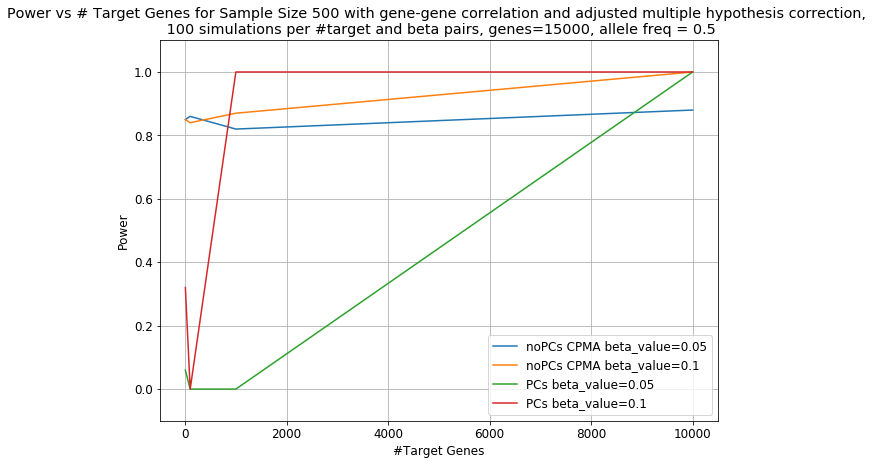

In [4]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

def plot_power(targets, beta_values, fname, label_name):
    power = []
    for beta in beta_values:
        for tar in targets:   
            value = str(beta).replace(".","")
            path = f'/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_{tar}/Beta_{value}/{fname}'
            cur_file = pd.read_csv(path, sep='\t')
            power.append(float(cur_file['power_adjusted']))
        plt.plot(targets, power, label=f'{label_name}={beta}')
        power = []
    
plt.figure(figsize=(10,7))

targets = [5, 100, 1000, 10000]
# targets = [20, 40, 60, 80, 100, 150, 200, 250, 300]
# targets = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700]

# targets = [20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
# targets = [ 0, 5, 10, 15, 20, 30, 40, 60, 80, 100]
#targets = [5, 10, 15, 30]

# targets = [0, 5, 10, 15, 20, 30, 40, 60, 80, 100, 200, 300, 400, 700, 1000, 5000, 10000, 15000]
#targets = [0, 20, 40, 60, 80, 100, 200, 300, 400, 700, 1000, 5000, 10000, 15000]

beta_values = [0.05, 0.1]



plot_power(targets, beta_values, 'power_cpmax_1.0_adjusted_realnumsnps.txt', 'noPCs CPMA beta_value')
plot_power(targets, beta_values, 'power_PCs_cpmax_1.0.txt', 'PCs beta_value')
# plot_power(targets, beta_values, 'power_matrix-eqtl_onesuccess_realnumsnps.txt', 'Pairwise') 
# plot_power(targets, beta_values, 'power_mixtureModel_adjusted_realnumsnps.txt', 'mixtureModel beta_value')

      
plt.xlabel('#Target Genes')
plt.ylabel('Power')
plt.title('Power vs # Target Genes for Sample Size 500 with gene-gene correlation and adjusted multiple hypothesis correction, \n 100 simulations per #target and beta pairs, genes=15000, allele freq = 0.5')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
    

In [5]:
numtar5_beta01 = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_5/Beta_01/Simulation_0/expression_PCs.csv', sep='\t')

In [6]:
numtar5_beta01

,Unnamed: 0,Sample0,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,...,Sample490,Sample491,Sample492,Sample493,Sample494,Sample495,Sample496,Sample497,Sample498,Sample499
0,PC0,5.355772e+01,2.139277e+01,-5.214485e+01,-2.541367e+01,-1.423988e+01,-4.439158e+00,-7.536155e+01,7.639055e+01,-9.317685e+01,...,3.353677e+01,7.683496e+01,3.026062e+01,-7.823886e+01,5.150060e+00,-1.077755e+02,1.714893e+01,4.203911e+01,7.759695e+01,4.869256e+01
1,PC1,2.193474e+01,2.648052e+01,-6.184983e+01,9.284142e+01,5.154946e+01,4.313514e+01,-7.474873e+00,6.199437e-01,1.487931e+01,...,1.801160e+01,-1.011167e+01,-4.388217e+01,3.057739e+01,-1.934498e+01,5.436560e+01,-4.324184e+01,-4.314174e+01,-7.588229e+01,-4.306198e+01
2,PC2,4.831710e+01,-1.735856e+01,-2.391092e+01,1.542593e+00,6.116601e+00,7.819481e+00,2.051771e+01,3.095931e+01,-5.124868e+00,...,3.198402e+01,7.877435e+00,-3.355125e+01,-1.290786e+01,5.791737e+01,2.224181e+01,4.690067e+01,-2.045164e+01,-1.418268e+01,5.811974e+00
3,PC3,-1.607163e+01,-2.340309e+00,1.086427e+02,5.609772e+01,4.591905e+01,-2.385074e+00,6.330648e+01,-1.826334e+01,-6.255793e+00,...,-2.557175e+01,-2.172324e+01,-8.619703e+00,4.526991e+01,-6.298384e+00,-2.448815e+01,-1.989607e+01,1.257706e+00,-6.931675e+00,2.356098e+01
4,PC4,-2.604912e+01,7.431063e+00,-6.445470e+00,3.491204e+01,-9.725872e+00,3.894848e+01,1.812537e+01,-4.787660e-01,-1.031067e+01,...,1.166986e+01,2.859932e+01,-2.254127e+00,1.289680e+01,5.954667e+00,2.018006e+01,4.032594e+01,2.600484e+00,-1.030723e+01,3.317953e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,PC495,-5.125973e-03,-3.649247e-02,2.527044e-03,4.016014e-03,-6.997141e-03,7.776544e-03,2.368600e-02,-3.841221e-02,3.290402e-04,...,1.104237e-02,3.618104e-02,3.123648e-03,-2.660800e-03,1.522997e-02,-3.809525e-03,-7.532112e-03,-3.833231e-02,-3.143917e-02,1.702731e-02
496,PC496,-2.034871e-02,1.842354e-02,-1.160622e-02,-5.302080e-03,9.774728e-03,-1.458549e-02,1.710391e-02,2.178232e-02,-2.507004e-03,...,-1.262851e-02,1.243451e-02,4.160504e-03,-1.484550e-02,-2.472862e-02,2.100531e-02,7.644774e-03,2.668994e-02,3.504059e-02,-7.594926e-03
497,PC497,2.886131e-02,-1.432369e-02,2.128766e-02,3.579787e-02,-1.777581e-03,-4.919555e-03,1.598082e-02,-6.538539e-04,-1.608858e-02,...,1.015101e-02,-2.872584e-02,3.424399e-03,-4.696487e-03,1.441780e-02,6.803787e-03,8.841665e-03,9.450559e-03,3.093877e-02,-2.497466e-02
498,PC498,-2.045318e-03,1.437518e-02,-1.413119e-02,1.170839e-02,-8.557891e-03,1.851070e-02,3.545100e-02,2.596469e-02,-3.045116e-03,...,-2.797912e-02,2.945105e-02,-7.233760e-03,-2.148798e-03,-4.425026e-02,5.145641e-03,7.772655e-03,-1.998204e-02,-2.876303e-02,3.649986e-03


In [47]:
def perform_pca(input):
    expression = pd.read_csv(input, sep='\t')
    expression.set_index('Unnamed: 0', inplace=True)
    samples = list(expression.columns)
    expression_trans = expression.values.transpose()
    pca = sklearn.decomposition.PCA(n_components=100)
    pca.fit(expression_trans)
    expression_trans_pca = pca.transform(expression_trans)
    PCs = ['PC' + str(i) for i in range(len(expression_trans_pca[0]))]
    PC_trans_df = pd.DataFrame(expression_trans_pca.T, columns=samples, index=PCs)
    return pca, expression_trans_pca, PC_trans_df

In [72]:
matrixeqtl = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_1000/Beta_01/Simulation_0/CPMA/gene-snp-eqtl'
matrixeqtl_df = pd.read_csv(matrixeqtl, sep='\t')

(array([1437., 1053., 1214., 1348., 1379., 1635., 1673., 1739., 1778.,
        1744.]),
 array([1.99290994e-05, 1.00003474e-01, 1.99987019e-01, 2.99970565e-01,
        3.99954110e-01, 4.99937655e-01, 5.99921200e-01, 6.99904745e-01,
        7.99888290e-01, 8.99871835e-01, 9.99855381e-01]),
 <a list of 10 Patch objects>)

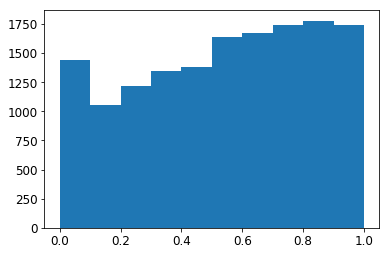

In [73]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP0']['p-value'])

(array([1180., 1423., 1424., 1488., 1556., 1530., 1490., 1583., 1677.,
        1649.]),
 array([4.01611090e-04, 1.00353373e-01, 2.00305135e-01, 3.00256898e-01,
        4.00208660e-01, 5.00160422e-01, 6.00112184e-01, 7.00063946e-01,
        8.00015708e-01, 8.99967470e-01, 9.99919232e-01]),
 <a list of 10 Patch objects>)

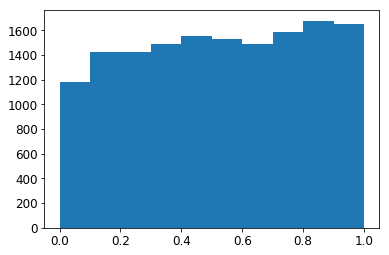

In [74]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP10']['p-value'])

In [59]:
matrixeqtl = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_5/Beta_01/Simulation_45/CPMA/gene-snp-eqtl'
matrixeqtl_df = pd.read_csv(matrixeqtl, sep='\t')

(array([ 808., 1198., 1399., 1489., 1562., 1677., 1714., 1734., 1715.,
        1704.]),
 array([0.0013512 , 0.10121202, 0.20107284, 0.30093366, 0.40079448,
        0.50065529, 0.60051611, 0.70037693, 0.80023775, 0.90009857,
        0.99995938]),
 <a list of 10 Patch objects>)

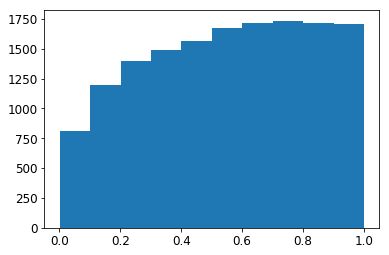

In [65]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP0']['p-value'])

(array([1564., 1660., 1542., 1498., 1448., 1479., 1418., 1501., 1463.,
        1427.]),
 array([4.45054397e-04, 1.00397779e-01, 2.00350504e-01, 3.00303228e-01,
        4.00255953e-01, 5.00208677e-01, 6.00161402e-01, 7.00114127e-01,
        8.00066851e-01, 9.00019576e-01, 9.99972300e-01]),
 <a list of 10 Patch objects>)

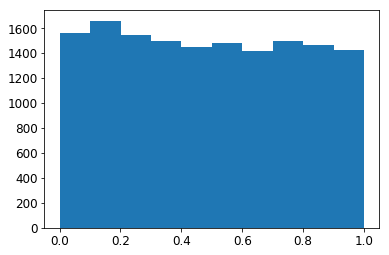

In [67]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP10']['p-value'])

In [68]:
matrixeqtl = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_5/Beta_01/Simulation_0/CPMA/gene-snp-eqtl'
matrixeqtl_df = pd.read_csv(matrixeqtl, sep='\t')

(array([ 943.,  931., 1209., 1379., 1451., 1707., 1788., 1858., 1884.,
        1850.]),
 array([3.40823203e-04, 1.00292279e-01, 2.00243735e-01, 3.00195190e-01,
        4.00146646e-01, 5.00098102e-01, 6.00049558e-01, 7.00001013e-01,
        7.99952469e-01, 8.99903925e-01, 9.99855381e-01]),
 <a list of 10 Patch objects>)

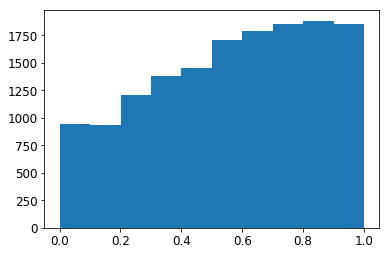

In [69]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP0']['p-value'])

(array([1173., 1436., 1409., 1492., 1559., 1527., 1504., 1570., 1687.,
        1643.]),
 array([4.01611090e-04, 1.00353373e-01, 2.00305135e-01, 3.00256898e-01,
        4.00208660e-01, 5.00160422e-01, 6.00112184e-01, 7.00063946e-01,
        8.00015708e-01, 8.99967470e-01, 9.99919232e-01]),
 <a list of 10 Patch objects>)

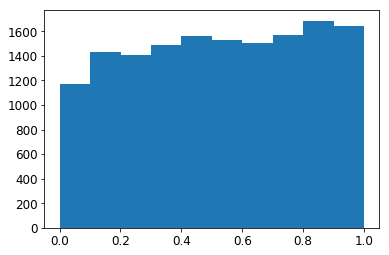

In [71]:
plt.hist(matrixeqtl_df.loc[matrixeqtl_df['SNP'] == 'SNP10']['p-value'])

In [61]:
matrixeqtl_df

,SNP,gene,beta,t-stat,p-value,FDR
0,SNP16,Gene6659,2.986017e-01,4.906893,0.000001,0.827362
1,SNP16,Gene14425,-3.172499e-01,-4.804401,0.000002,0.827362
2,SNP16,Gene6320,2.898628e-01,4.793059,0.000002,0.827362
3,SNP26,Gene11378,-2.969981e-01,-4.692428,0.000003,0.827362
4,SNP87,Gene3853,2.831146e-01,4.687303,0.000004,0.827362
...,...,...,...,...,...,...
1499995,SNP92,Gene6706,-1.672733e-07,-0.000003,0.999998,0.999999
1499996,SNP35,Gene13189,1.679122e-07,0.000003,0.999998,0.999999
1499997,SNP12,Gene9393,-1.200634e-07,-0.000002,0.999999,0.999999
1499998,SNP22,Gene7829,-8.878319e-08,-0.000001,0.999999,0.999999


In [54]:
input = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_5/Beta_01/Simulation_45/expression.csv'
pca5, pca5_trans, pc5_df = perform_pca(input)

In [51]:
pca5

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'PC2')

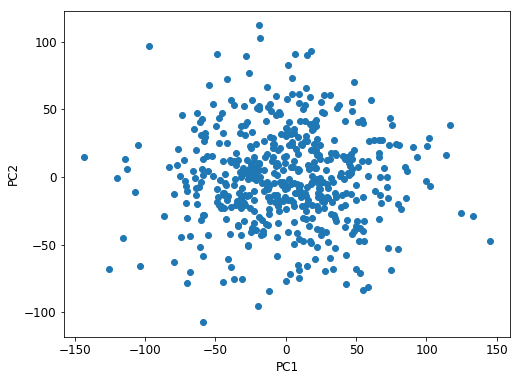

In [57]:
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.scatter(pca5_trans[:,0], pca5_trans[:,1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [12]:
input = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_100/Beta_01/Simulation_0/expression.csv'
pca100, pc100_df = perform_pca(input)

Text(0.5, 0, 'eigenvalue')

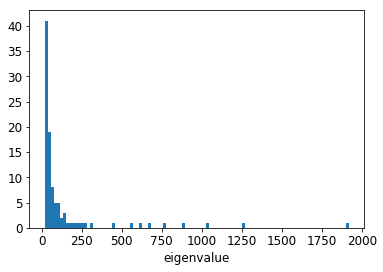

In [55]:
plt.hist(pca5.explained_variance_, bins=100)
plt.xlabel('eigenvalue')

Text(0.5, 0, 'eigenvalue')

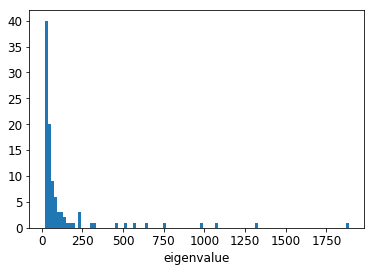

In [42]:
plt.hist(pca5.explained_variance_, bins=100)
plt.xlabel('eigenvalue')

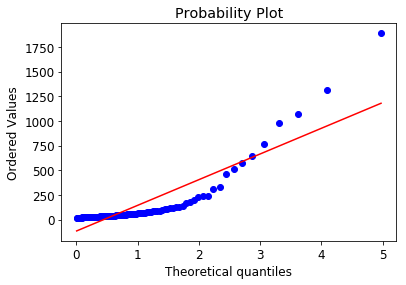

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pca5.explained_variance_, dist='expon',  plot=ax)

pass

(array([39., 21.,  9.,  6.,  3.,  3.,  2.,  0.,  2.,  1.,  0.,  3.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  18.49627619,   37.20652814,   55.91678009,   74.62703203,
          93.33728398,  112.04753593,  130.75778787,  149.46803982,
         168.17829177,  186.88854371,  205.59879566,  224.30904761,
         243.01929955,  261.7295515 ,  280.43980345,  299.15005539,
         317.86030734,  336.57055929,  355.28081123,  373.99106318,
         392.70131513,  411.41156707,  430.12181902,  448.83207097,
         467.54232291,  48

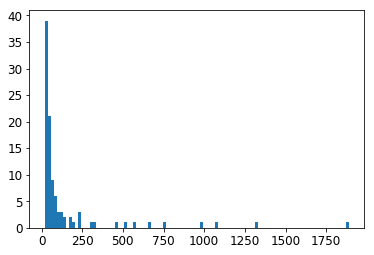

In [43]:
plt.hist(pca100.explained_variance_, bins=100)

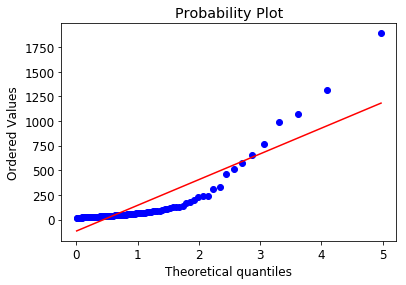

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pca100.explained_variance_, dist='expon',  plot=ax)

pass

In [15]:
input = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_10000/Beta_01/Simulation_0/expression.csv'
pca100, pc100_df = perform_pca(input)

(array([86.,  5.,  3.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([  18.49627619,  205.59879566,  392.70131513,  579.80383459,
         766.90635406,  954.00887353, 1141.11139299, 1328.21391246,
        1515.31643193, 1702.41895139, 1889.52147086]),
 <a list of 10 Patch objects>)

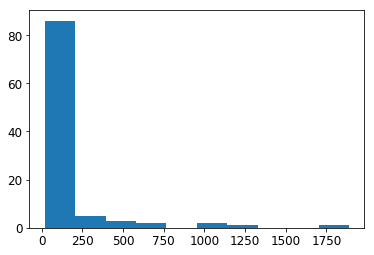

In [16]:
plt.hist(pca100.explained_variance_)

In [17]:
pca100.explained_variance_

array([1889.52147086, 1310.46192049, 1072.96820313,  988.37285135,
        764.96876871,  656.79716263,  577.06293915,  512.48485603,
        461.93205669,  331.24923826,  311.88821629,  241.28492082,
        238.71074039,  224.42240229,  201.37437743,  175.62282187,
        168.66973323,  140.69093161,  131.40653247,  130.01485541,
        123.27550264,  117.00966486,  109.00561796,  103.70773967,
         97.50774455,   91.3642137 ,   87.67792307,   86.73377082,
         82.90146033,   79.1802226 ,   75.94030719,   74.27269215,
         71.21658846,   68.77242443,   67.00846799,   65.13333066,
         64.67912757,   63.10742955,   58.07628991,   56.88477181,
         54.94771828,   54.65275097,   53.01949193,   52.49482283,
         51.37171194,   50.00738689,   49.36407158,   48.22025266,
         47.32092495,   45.93956709,   45.0535244 ,   44.16056874,
         43.20831759,   42.8227805 ,   40.89325625,   40.26094683,
         39.87153634,   39.47543995,   38.89977178,   37.94845

In [18]:
pca5.explained_variance_

array([1887.86202221, 1310.14565364, 1071.97792154,  980.74985409,
        764.80295526,  648.25469056,  574.69764961,  513.17075444,
        462.19807916,  330.35029723,  311.72475829,  240.77363896,
        238.27331862,  224.32773379,  201.02185928,  175.50689315,
        165.34912668,  140.63074058,  131.04606476,  129.26282533,
        122.78102116,  116.10215545,  106.20398111,  103.51468822,
         97.6403541 ,   91.30172637,   87.03264963,   86.56758281,
         82.64906815,   79.15424108,   75.28812177,   74.38904081,
         71.33384248,   68.73971812,   67.0969974 ,   65.01682055,
         63.76793689,   61.1780347 ,   57.97874032,   56.88696111,
         54.75662923,   53.41250212,   53.0098141 ,   52.05680989,
         51.48895545,   50.04163505,   48.69891058,   47.46938562,
         46.97209336,   45.9287604 ,   45.03165233,   43.3943613 ,
         43.04874824,   41.47538976,   40.70219226,   39.90066544,
         39.69523653,   39.52305401,   38.94939562,   37.94955

(array([40., 18., 10.,  7.,  3.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  18.5406104 ,   37.13332571,   55.72604102,   74.31875632,
          92.91147163,  111.50418694,  130.09690225,  148.68961755,
         167.28233286,  185.87504817,  204.46776347,  223.06047878,
         241.65319409,  260.2459094 ,  278.8386247 ,  297.43134001,
         316.02405532,  334.61677063,  353.20948593,  371.80220124,
         390.39491655,  408.98763186,  427.58034716,  446.17306247,
         464.76577778,  48

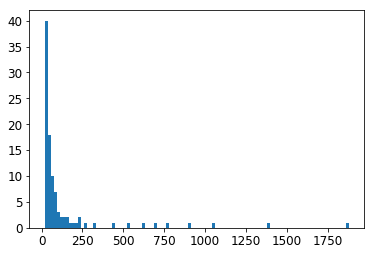

In [44]:
input = '/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/numTarget_5/Beta_01/Simulation_25/expression.csv'
pca5, pc5_df = perform_pca(input)
plt.hist(pca5.explained_variance_, bins=100)

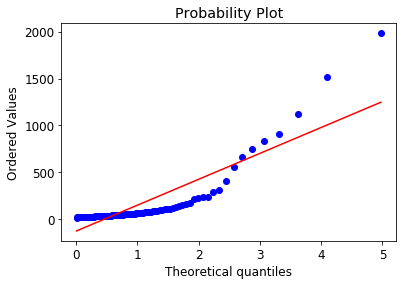

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(pca5.explained_variance_, dist='expon',  plot=ax)

pass

In [29]:
?stats.probplot